# Blotto 6 Soldiers

In [1]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [2]:
#initialize game
game = Blotto(6,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 4], [1, 2, 3], [2, 2, 2]]
Number of Actions: 3
Action Spaces: {'agent_0': Discrete(3), 'agent_1': Discrete(3)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

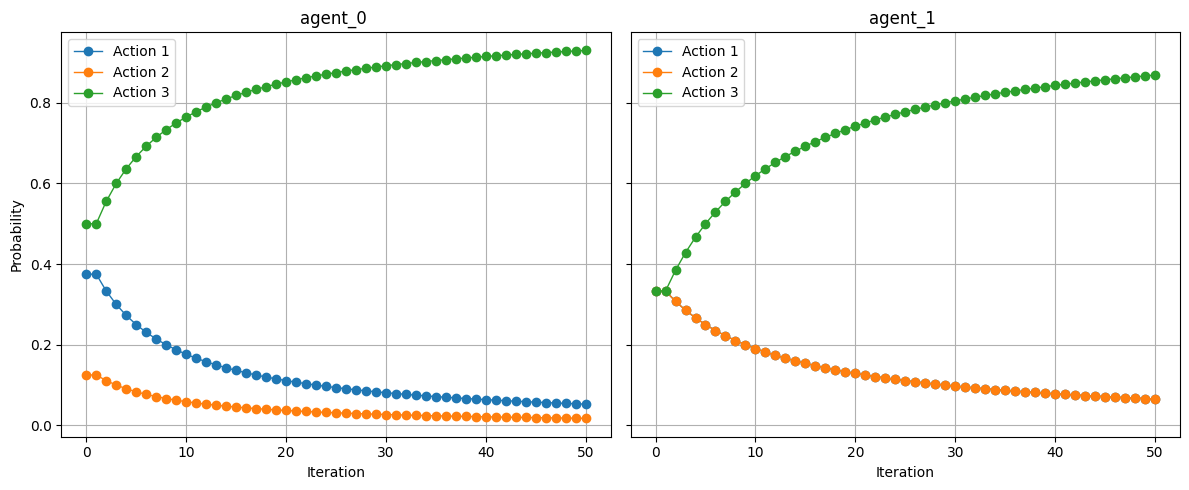

In [8]:
fp_agents = {agent: FictitiousPlay(game, agent) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=50, title_suffix="")

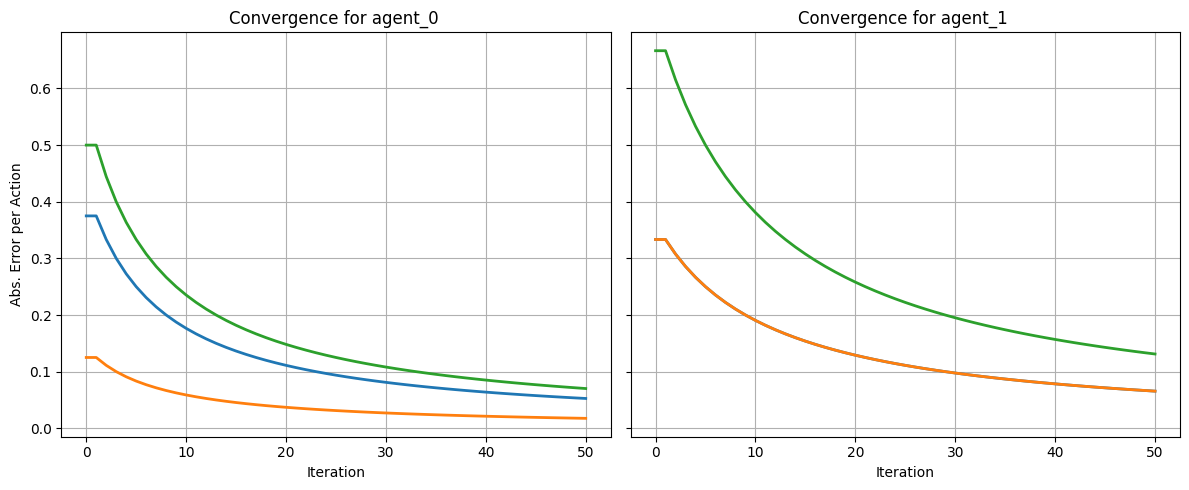

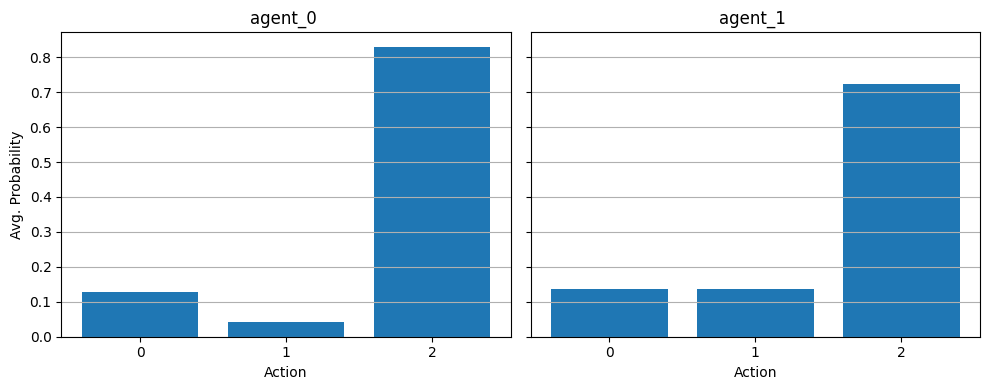

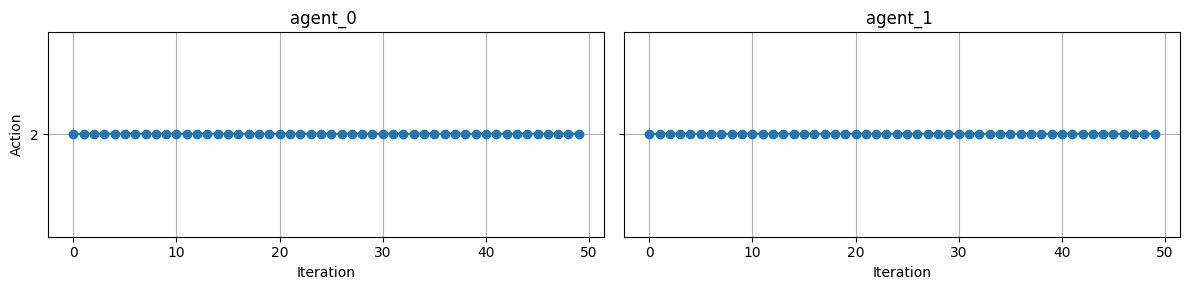

In [9]:

nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [12]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.05263158 0.01754386 0.92982456]
agent_1 [0.06557377 0.06557377 0.86885246]
Action with high probability for agent_0: [2, 2, 2]
Action with high probability for agent_1: [2, 2, 2]


# Regret Matching vs Regret Matching

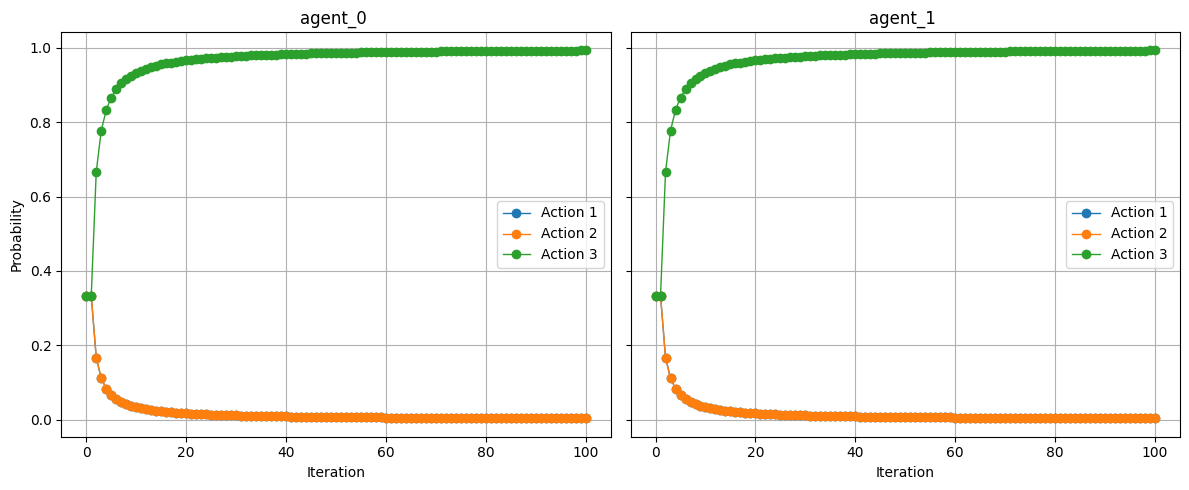

In [11]:
rm_agents = {agent: RegretMatching(game, agent) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=100, title_suffix="")

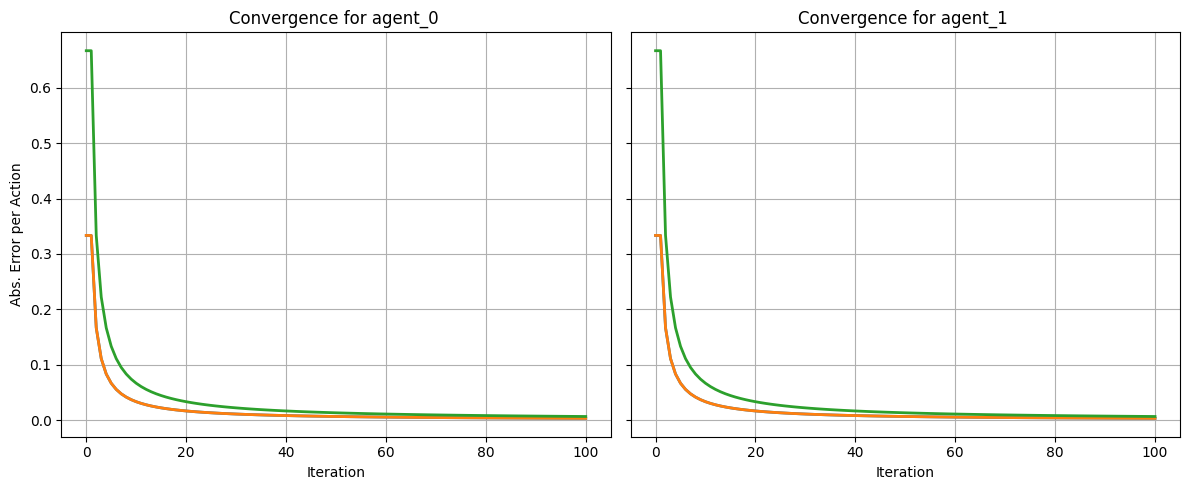

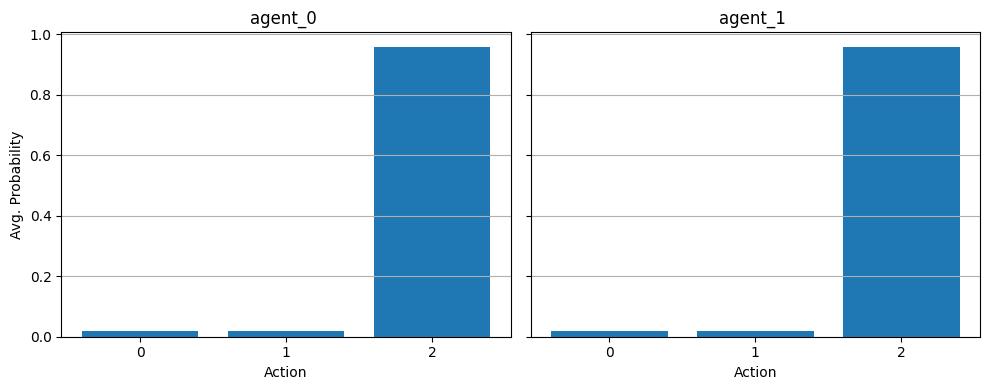

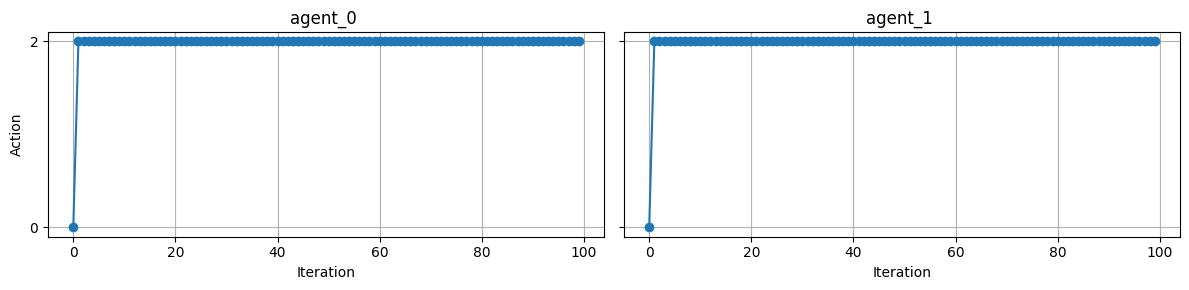

In [13]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [14]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00333333 0.00333333 0.99333333]
agent_1 [0.00333333 0.00333333 0.99333333]
Action with high probability for agent_0: [2, 2, 2]
Action with high probability for agent_1: [2, 2, 2]


# Fictitious Play vs Regret Matching

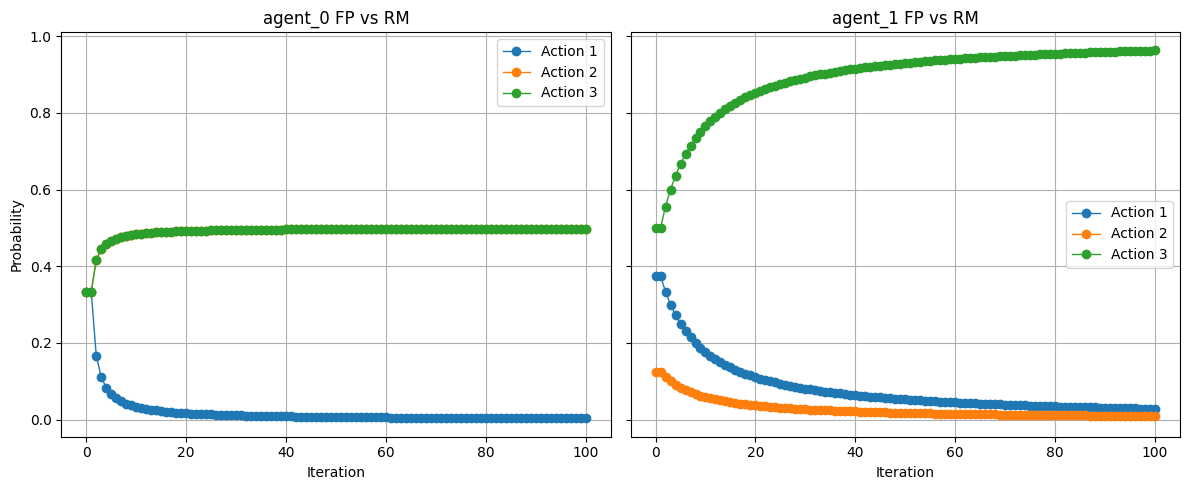

In [15]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0]),
              agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=100, title_suffix="FP vs RM")

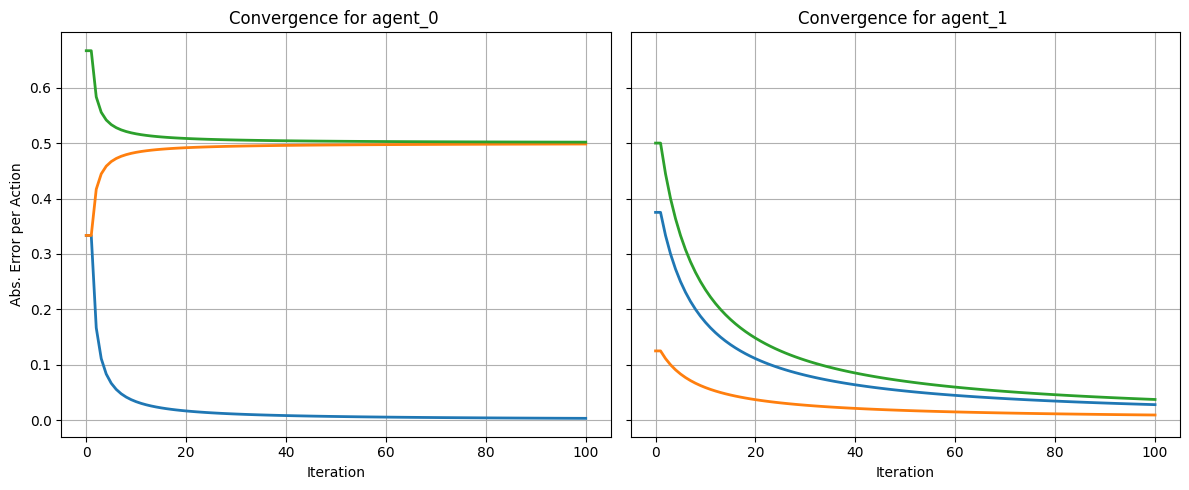

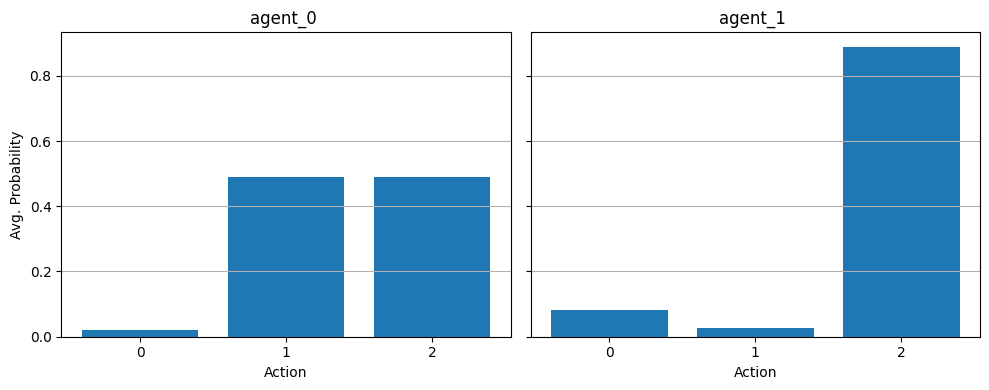

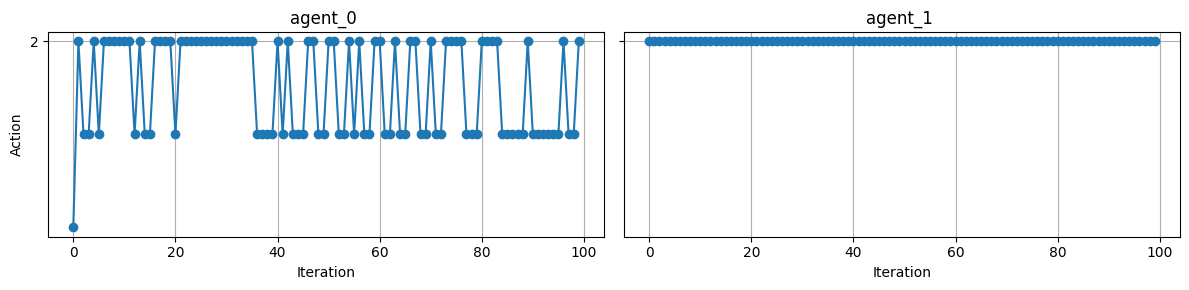

In [16]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [17]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00333333 0.49833333 0.49833333]
agent_1 [0.02803738 0.00934579 0.96261682]
Action with high probability for agent_0: [1, 2, 3]
Action with high probability for agent_1: [2, 2, 2]


# Random Agent vs Random Agent

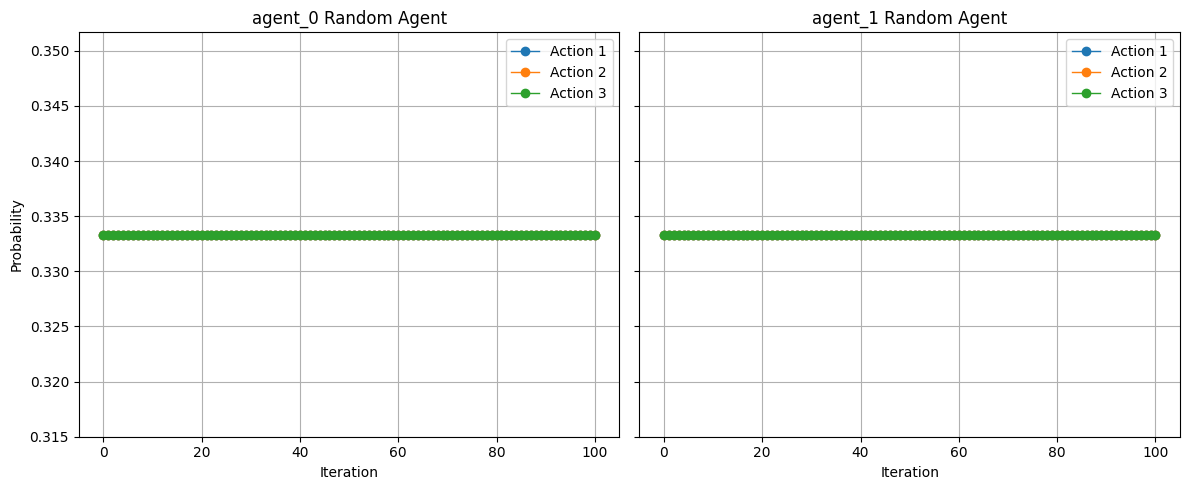

In [18]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=100, title_suffix="Random Agent")

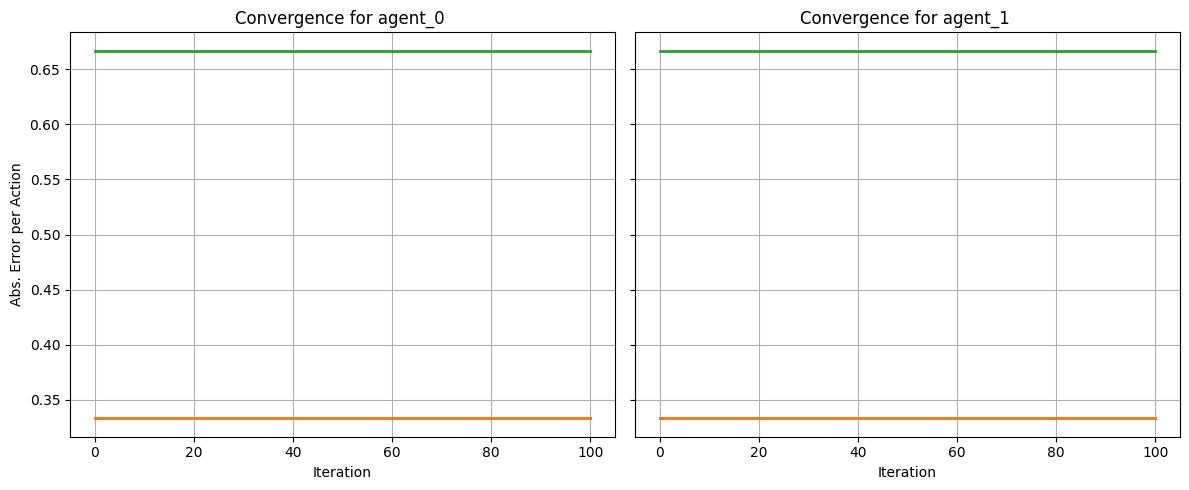

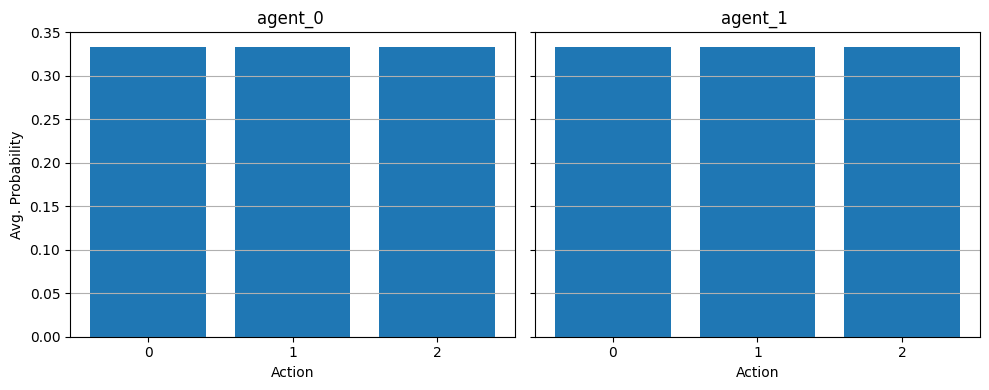

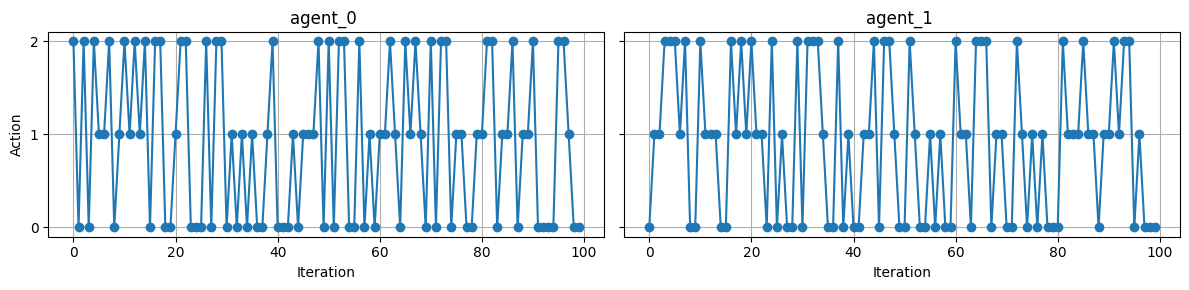

In [19]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

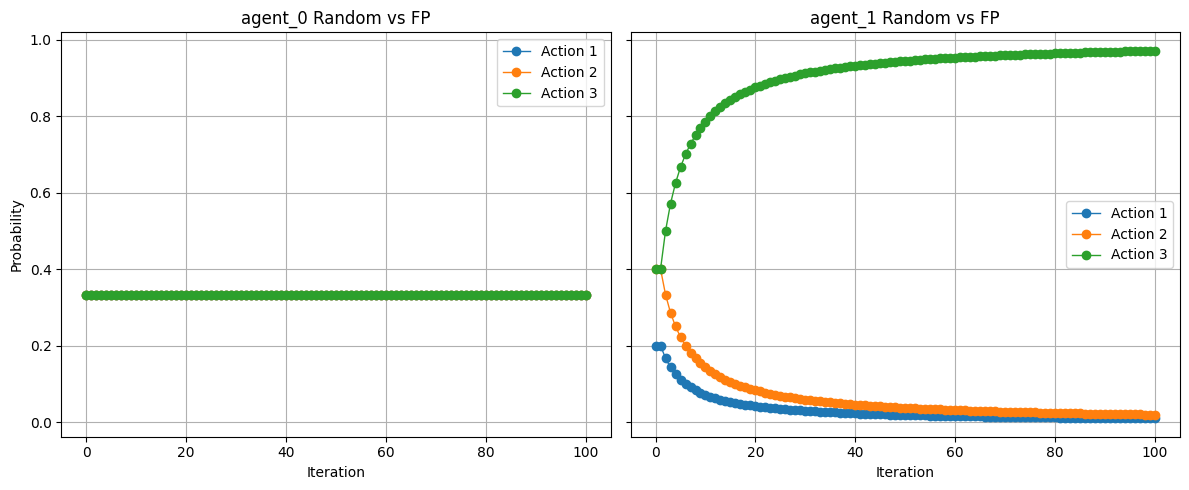

In [20]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=100, title_suffix="Random vs FP")

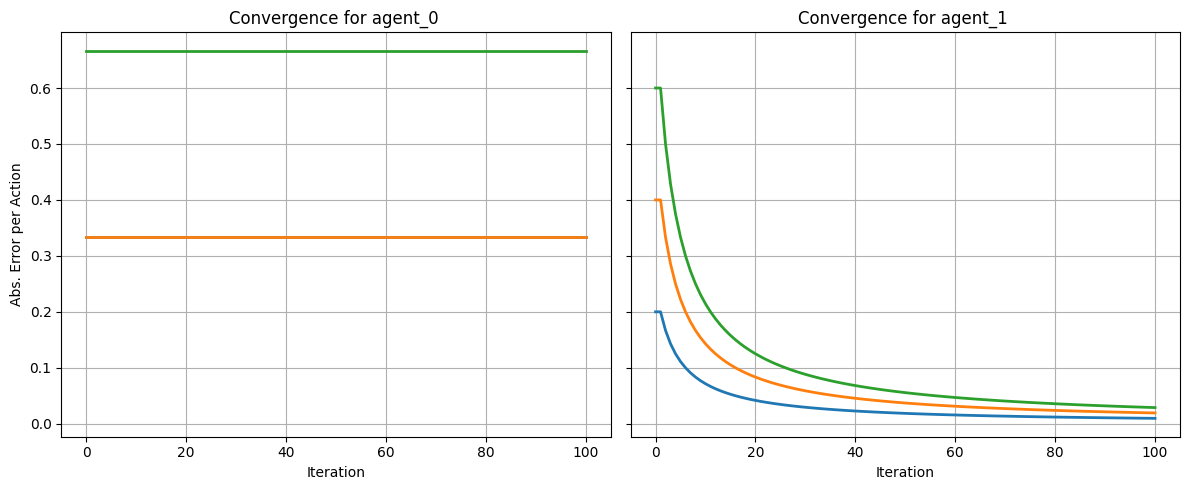

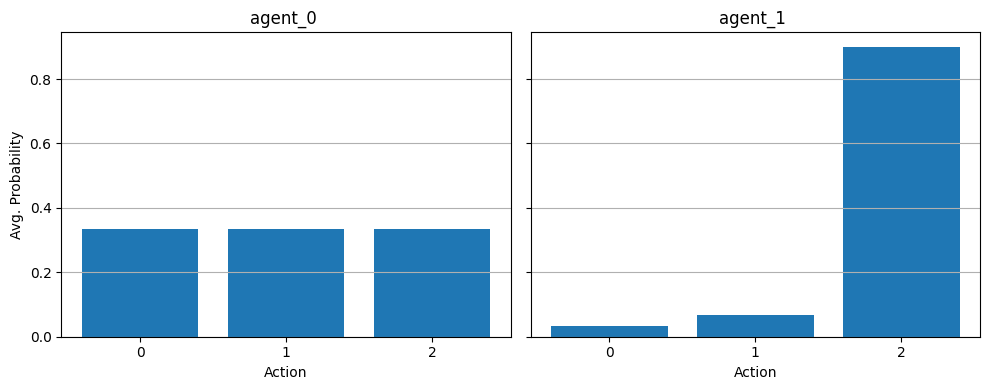

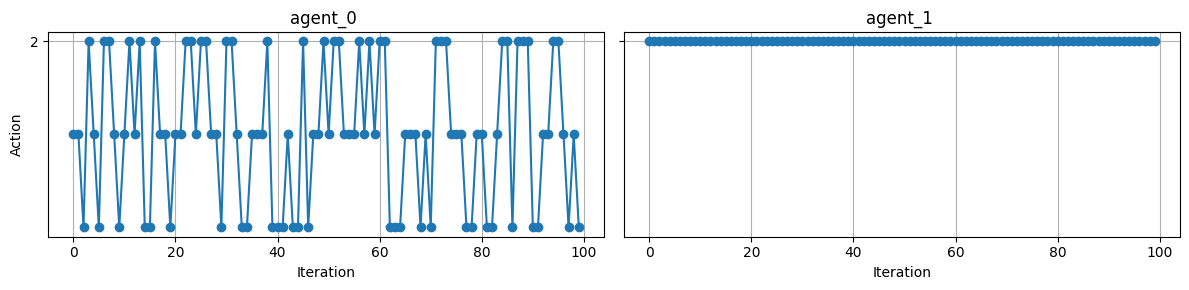

In [21]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [22]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.33333333 0.33333333 0.33333333]
agent_1 [0.00961538 0.01923077 0.97115385]
Action with high probability for agent_0: [1, 1, 4]
Action with high probability for agent_1: [2, 2, 2]


# Random Agent vs Regret Matching


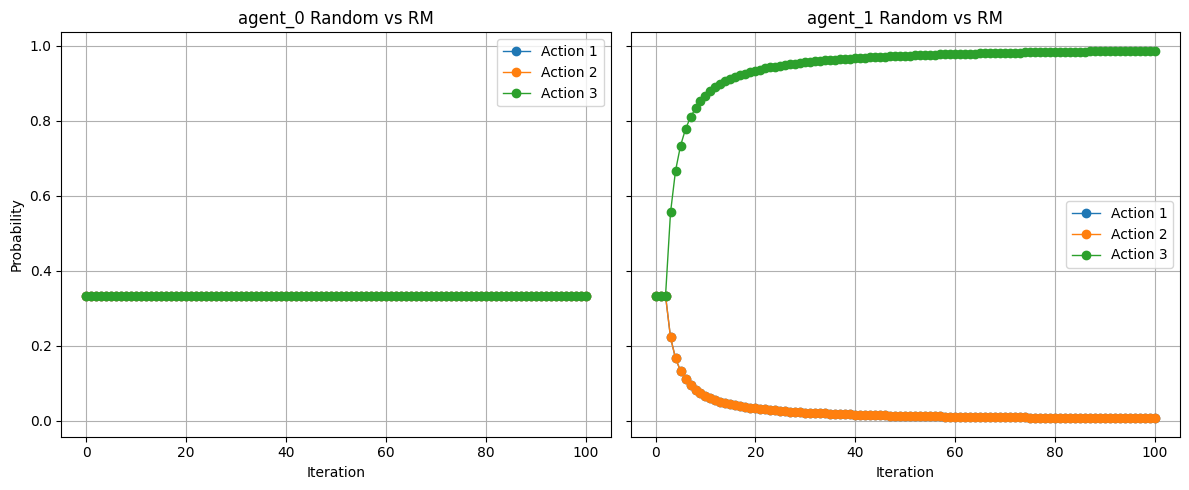

In [23]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=100, title_suffix="Random vs RM")

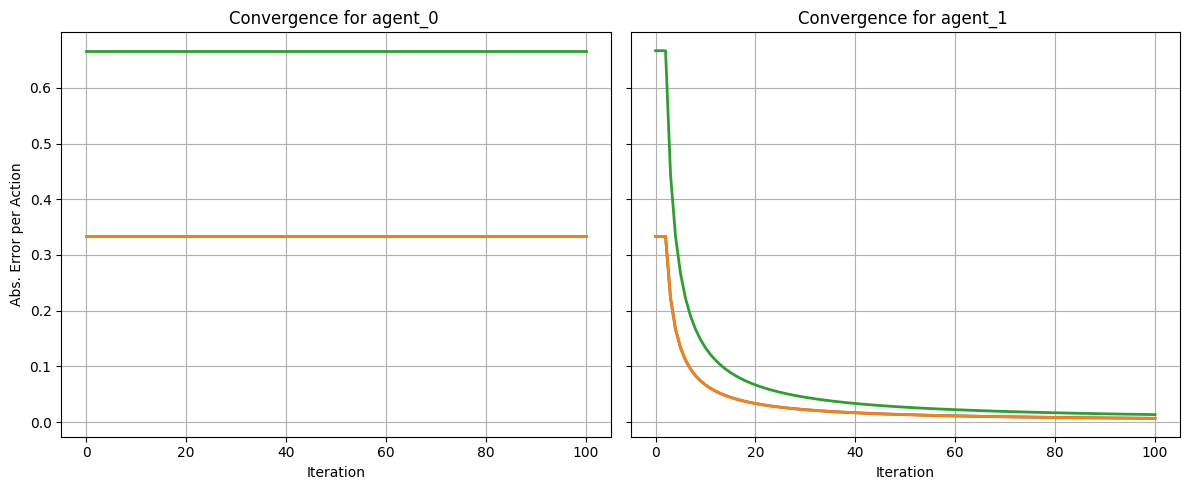

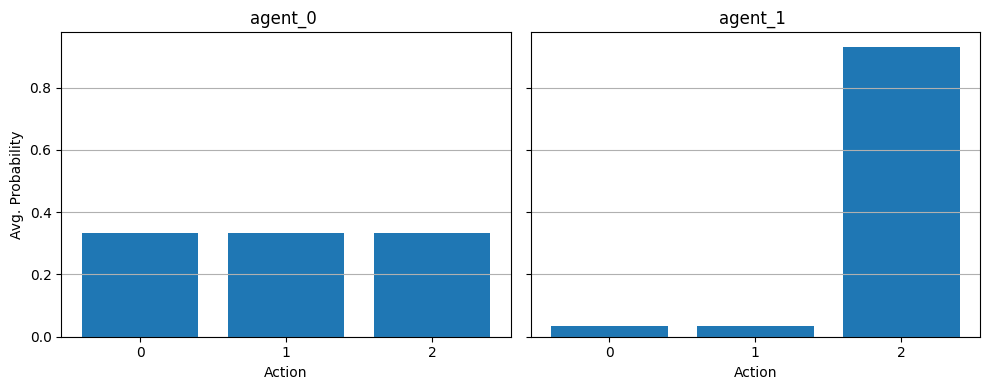

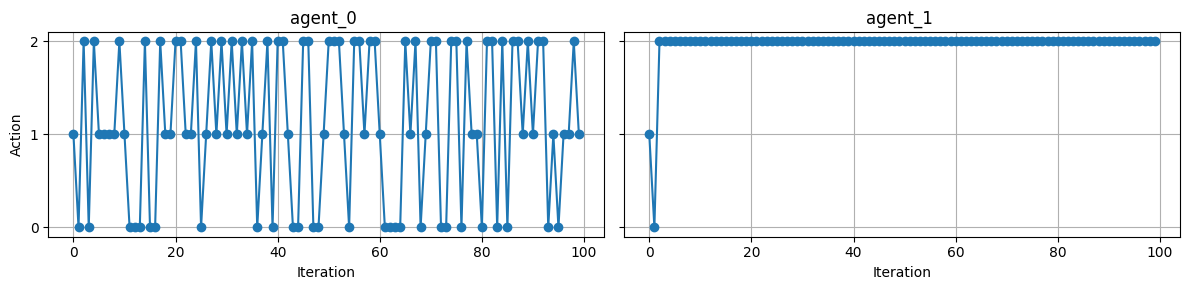

In [24]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [25]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.33333333 0.33333333 0.33333333]
agent_1 [0.00961538 0.01923077 0.97115385]
Action with high probability for agent_0: [1, 1, 4]
Action with high probability for agent_1: [2, 2, 2]
